In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import numpy as np

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.8.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
psc_df = pd.read_csv('/Users/labc02/Documents/PDCB_data/spPSC_means.csv')
psc_df.columns

Index(['Date', 'Genotype', 'Peak', 'Inst Fq', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [7]:
psc_df.groupby('Genotype')['Date'].count()

Genotype
KO    11
WT     9
Name: Date, dtype: int64

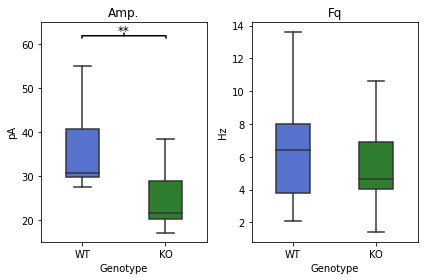

In [20]:
fig, axs = plt.subplots(1,2)
sns.boxplot(x = 'Genotype', y = 'Peak', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[0], showfliers = False)
axs[0].set_ylim(15,65)
axs[0].annotate('**', xy=(0.5, .93), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=3.5, lengthB=.2', lw=1.5, color='k'))
axs[0].set_title('Amp.')
axs[0].set_ylabel('pA')

sns.boxplot(x = 'Genotype', y = 'Inst Fq', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = axs[1], showfliers = False)
axs[1].set_title('Fq')
axs[1].set_ylabel('Hz')
plt.tight_layout()

### Amplitude sPSC

In [8]:
pg.normality(data = psc_df, dv = 'Peak', group= 'Genotype')

,W,pval,normal
WT,0.808560,0.025563,False
KO,0.837011,0.028857,False


In [11]:
pg.mwu(psc_df['Peak'][psc_df['Genotype']=='WT'], psc_df['Peak'][psc_df['Genotype']=='KO'], 'one-sided')

,U-val,tail,p-val,RBC,CLES
MWU,81.0,greater,0.009257,-0.636364,0.818182


### Instantaneous Frequency

In [10]:
pg.normality(data = psc_df, dv = 'Inst Fq', group= 'Genotype')

,W,pval,normal
WT,0.939777,0.579559,True
KO,0.909186,0.238530,True


In [13]:
pg.ttest(psc_df['Inst Fq'][psc_df['Genotype']=='WT'], psc_df['Inst Fq'][psc_df['Genotype']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.749329,16.744634,two-sided,0.464057,"[-2.27, 4.76]",0.339011,0.486,0.110257


In [14]:
def ecdf(raw_data):
    '''[np.array -> tuple]
    Equivalent to R's ecdf(). Credit to Kripanshu Bhargava from Codementor'''
    cdfx = np.unique(raw_data)
    x_values = np.linspace(start=min(cdfx), stop=max(cdfx), num=len(cdfx))
    size_data = raw_data.size
    y_values = []
    for i in x_values:
        # all the values in raw data less than the ith value in x_values
        temp = raw_data[raw_data <= i]
        # fraction of that value with respect to the size of the x_values
        value = temp.size / size_data

        y_values.append(value)

    return (x_values, y_values)

In [26]:
psc_raw = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_Analysis_raw/sp_Peaks-Table 1.csv')
inst_fq = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_Analysis_raw/sp_Int-Table 1.csv')

In [25]:
psc_raw.columns

Index(['050718_WT', '071118a_KO', '011118a_KO', '011118b_KO', '071118b_KO',
       '071118c_KO', '081118a_KO', '081118b_KO', '100718_WT', '200718a_WT',
       '200718b_WT', '240718_KO', '051020_WT', '071020_WT', '100920_KO',
       '131020_WT', '210920_KO', '220920_KO', '230920_WT', '250920_WT'],
      dtype='object')

In [180]:
WT_epsc = np.array([])
KO_epsc = np.array([])
WT_isi = np.array([])
KO_isi = np.array([])

for column in psc_raw:
    if 'WT' in column:
        WT_epsc = np.append(WT_epsc, psc_raw[column].dropna().abs())
        WT_isi = np.append(WT_isi, inst_fq[column].dropna())
    elif 'KO' in column:
        KO_epsc = np.append(KO_epsc, psc_raw[column].dropna().abs())
        KO_isi = np.append(KO_isi, inst_fq.dropna())
KO_ecdf = ecdf(KO_epsc.round(2))
WT_ecdf = ecdf(WT_epsc.round(2))
KO_isicd = ecdf(KO_isi.round(2))
WT_isicd = ecdf(WT_isi.round(2))


In [181]:
print(len(WT_epsc), len(KO_epsc), len(WT_isi), len(KO_isi))

5858 5457 5831 22000


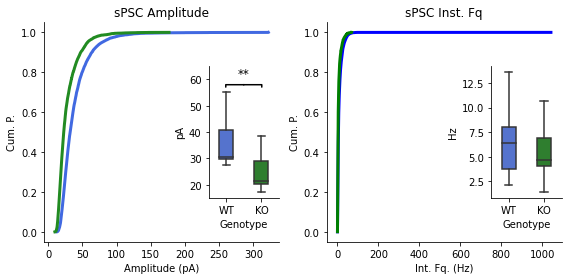

In [182]:
ecdf_fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].plot(WT_ecdf[0], WT_ecdf[1], color='royalblue', label='WT', linewidth=3)
axs[0].plot(KO_ecdf[0], KO_ecdf[1], color='forestgreen', label='KO', linewidth=3)
axs[0].set(ylabel  = 'Cum. P.', xlabel='Amplitude (pA)')
axs[0].set_title('sPSC Amplitude')
sns.despine(ax = axs[0])
ins_1 = axs[0].inset_axes([.7, .2, .3, .6])

sns.boxplot(x = 'Genotype', y = 'Peak', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = ins_1, showfliers = False)
ins_1.set_ylim(15,65)
ins_1.annotate('**', xy=(0.5, .86), xytext=(0.5, .99), fontsize = 12, xycoords='axes fraction', ha='center',
                va='top', arrowprops=dict(arrowstyle='-[, widthB=1.5, lengthB=.2', lw=1.5, color='k'))
ins_1.set_ylabel('pA')
sns.despine(ax = ins_1)

axs[1].plot(WT_isicd[0], WT_isicd[1], color='b', label='WT', linewidth=3)
axs[1].plot(KO_isicd[0], KO_isicd[1], color='g', label='KO', linewidth=3)
axs[1].set(ylabel  = 'Cum. P.', xlabel='Int. Fq. (Hz)')
axs[1].set_title('sPSC Inst. Fq')

sns.despine(ax = axs[1])
ins_2 = axs[1].inset_axes([.7, .2, .3, .6])

sns.boxplot(x = 'Genotype', y = 'Inst Fq', data = psc_df, order = ['WT', 'KO'], palette = ['royalblue', 'forestgreen'], width = 0.4, ax = ins_2, showfliers = False)
ins_2.set_ylabel('Hz')
sns.despine(ax = ins_2)

plt.tight_layout()

In [183]:
ecdf_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/sPSC_fig.svg')

In [66]:
int_chars = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_CA3_Int.csv')

In [68]:
int_chars.columns

Index(['Date', 'Cell Type', 'Vm (mV)', 'Rn (Mohms)', 'Tau (ms)', 'Cm (pF)',
       'Rheobase (pA)', 'Sag (mV)', 'Gen_type', 'Sex'],
      dtype='object')

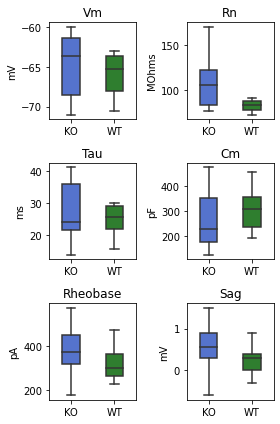

In [175]:
int_CA3, axs = plt.subplots(3,2, figsize= (4,6))
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Vm (mV)', width = 0.4, ax = axs[0,0], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[0,0].set_title('Vm')
axs[0,0].set_ylabel('mV')
axs[0,0].set_xlabel('')
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Rn (Mohms)', width = 0.4, ax = axs[0,1], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[0,1].set_title('Rn')
axs[0,1].set_ylabel('MOhms')
axs[0,1].set_xlabel('')
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Tau (ms)', width = 0.4, ax = axs[1,0], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[1,0].set_title('Tau')
axs[1,0].set_ylabel('ms')
axs[1,0].set_xlabel('')
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Cm (pF)', width = 0.4, ax = axs[1,1], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[1,1].set_title('Cm')
axs[1,1].set_ylabel('pF')
axs[1,1].set_xlabel('')
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Rheobase (pA)', width = 0.4, ax = axs[2,0], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[2,0].set_title('Rheobase')
axs[2,0].set_ylabel('pA')
axs[2,0].set_xlabel('')
sns.boxplot(data = int_chars, x = 'Gen_type', y = 'Sag (mV)', width = 0.4, ax = axs[2,1], palette=['royalblue', 'forestgreen'], showfliers = False)
axs[2,1].set_title('Sag')
axs[2,1].set_ylabel('mV')
axs[2,1].set_xlabel('')
plt.tight_layout()

In [176]:
int_CA3.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/int_charcs.svg')

In [75]:
for col in ['Vm (mV)', 'Rn (Mohms)', 'Tau (ms)', 'Cm (pF)','Rheobase (pA)', 'Sag (mV)']:
    print(f'Normality {col}')
    print(pg.normality(data = int_chars, dv = col, group='Gen_type'))

Normality Vm (mV)
           W      pval  normal
KO  0.885849  0.104191    True
WT  0.764825  0.011896   False
Normality Rn (Mohms)
           W      pval  normal
KO  0.864575  0.055804    True
WT  0.606178  0.000188   False
Normality Tau (ms)
           W      pval  normal
KO  0.914464  0.243295    True
WT  0.803753  0.031396   False
Normality Cm (pF)
           W      pval  normal
KO  0.916966  0.261770    True
WT  0.954866  0.760028    True
Normality Rheobase (pA)
           W      pval  normal
KO  0.977485  0.971606    True
WT  0.943114  0.641955    True
Normality Sag (mV)
           W      pval  normal
KO  0.960829  0.795598    True
WT  0.921259  0.440160    True


### Resting Potential (Vm)

In [76]:
pg.mwu(x = int_chars['Vm (mV)'][int_chars['Gen_type']=='WT'], y = int_chars['Vm (mV)'][int_chars['Gen_type']=='KO'])

,U-val,tail,p-val,RBC,CLES
MWU,37.0,two-sided,0.417186,0.229167,0.604167


### Input resistance

In [77]:
pg.mwu(x = int_chars['Rn (Mohms)'][int_chars['Gen_type']=='WT'], y = int_chars['Rn (Mohms)'][int_chars['Gen_type']=='KO'])

,U-val,tail,p-val,RBC,CLES
MWU,27.0,two-sided,0.113739,0.4375,0.71875


### Membrane Constant (Tau)

In [78]:
pg.mwu(x = int_chars['Tau (ms)'][int_chars['Gen_type']=='WT'], y = int_chars['Tau (ms)'][int_chars['Gen_type']=='KO'])

,U-val,tail,p-val,RBC,CLES
MWU,48.0,two-sided,0.969229,0.0,0.5


### Cell Capacitance (Cm)

In [81]:
pg.ttest(x = int_chars['Cm (pF)'][int_chars['Gen_type']=='WT'], y = int_chars['Cm (pF)'][int_chars['Gen_type']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,0.895241,17.166391,two-sided,0.38304,"[-56.91, 140.91]",0.391171,0.532,0.128279


### Rheobase (pA)

In [82]:
pg.ttest(x = int_chars['Rheobase (pA)'][int_chars['Gen_type']=='WT'], y = int_chars['Rheobase (pA)'][int_chars['Gen_type']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.178445,12.284325,two-sided,0.260943,"[-195.54, 58.04]",0.569135,0.649,0.218854


### Sag (mV)

In [83]:
pg.ttest(x = int_chars['Sag (mV)'][int_chars['Gen_type']=='WT'], y = int_chars['Sag (mV)'][int_chars['Gen_type']=='KO'])

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-1.275779,17.869888,two-sided,0.218368,"[-0.77, 0.19]",0.543218,0.703,0.203532


## IV Curve

In [97]:
iv_curv = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_CA3_IV.csv')

In [98]:
iv_curv.columns

Index(['Current (pA)', '011118_KO_male_CA3_II', '081118_KO_male_CA3_I',
       '081118_KO_male_CA3_II', '071118__KO_male_CA3_I',
       '071118_KO_male_CA3_II', '071118_KO_male_CA3_III',
       '011118_KO_male_CA3_II.1', '241118_KO_male_CA3', '030718_WT_female_CA3',
       '050718_WT_female_CA3', '100718_WT_female_CA3', '200718_WT_male_CA3_I',
       '200718_WT_male_CA3_II', '071020_WT_Female_CA3',
       '100920_KO_female_CA3_I', '100920_KO_female_CA3_III', '210920_KO_CA3_I',
       '210920_KO_CA3_II', '230920_WT_male_CA3_I', '250920_WT_CA3_I'],
      dtype='object')

In [99]:
iv_tidy = pd.melt(iv_curv, id_vars='Current (pA)', var_name = 'Cell', value_name= 'mV')

In [105]:
for cell in iv_tidy['Cell']:
    if 'WT' in cell:
        iv_tidy['Cell'][iv_tidy['Cell']==cell] = 'WT'
    elif 'KO' in cell:
        iv_tidy['Cell'][iv_tidy['Cell']==cell] = 'KO'

<ipython-input-105-3ea9b0d9b72a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iv_tidy['Cell'][iv_tidy['Cell']==cell] = 'KO'
<ipython-input-105-3ea9b0d9b72a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iv_tidy['Cell'][iv_tidy['Cell']==cell] = 'WT'


In [112]:
iv_tidy.rename(columns={'Cell': 'Genotype'}, inplace = True)

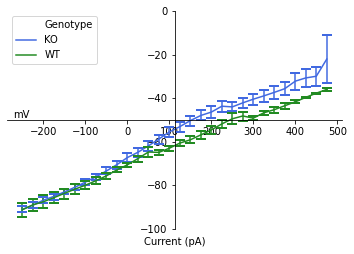

In [160]:
iv_fig, ax = plt.subplots(1,1)
sns.lineplot(data = iv_tidy, x='Current (pA)', y = 'mV', hue = 'Genotype', err_style="bars", ci=68, palette = ['royalblue', 'forestgreen'], ax = ax, err_kws = {'capsize': 5, 'capthick': 2})
ax.set_ylim(-100, -0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.xaxis.labelpad = 100
ax.set_ylabel('mV', rotation=0, ha='right')
ax.yaxis.labelpad=110

In [161]:
iv_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/IV_CA3.svg')

## Firing Curve

In [165]:
fire_curv = pd.read_csv('/Users/labc02/Documents/PDCB_data/Patch_CA3_Firing.csv')

In [166]:
fire_tidy = pd.melt(fire_curv, id_vars='Current (pA)', var_name = 'Cell', value_name= 'mV')

In [169]:
for cell in fire_tidy['Cell']:
    if 'WT' in cell:
        fire_tidy['Cell'][fire_tidy['Cell']==cell] = 'WT'
    elif 'KO' in cell:
        fire_tidy['Cell'][fire_tidy['Cell']==cell] = 'KO'

<ipython-input-169-dcbe6b6bb1b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_tidy['Cell'][fire_tidy['Cell']==cell] = 'KO'
<ipython-input-169-dcbe6b6bb1b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fire_tidy['Cell'][fire_tidy['Cell']==cell] = 'WT'


In [170]:
fire_tidy.rename(columns={'Cell': 'Genotype'}, inplace = True)

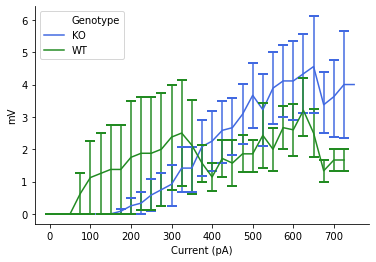

In [171]:
fire_fig, ax = plt.subplots(1,1)
sns.lineplot(data = fire_tidy, x='Current (pA)', y = 'mV', hue = 'Genotype', err_style="bars", ci=68, palette = ['royalblue', 'forestgreen'], ax = ax, err_kws = {'capsize': 5, 'capthick': 2})
#ax.set_ylim(-100, -0)
#ax.spines['left'].set_position('center')
#ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.xaxis.set_ticks_position('bottom')
#ax.yaxis.set_ticks_position('left')
#ax.xaxis.labelpad = 100
#ax.set_ylabel('mV', rotation=0, ha='right')
#ax.yaxis.labelpad=110

In [172]:
fire_fig.savefig('/Users/labc02/Documents/PDCB_data/Behavior/Figures/Fire_CA3.svg')